# Выявление закономерностей, определяющих успешность компьютерных  игр

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

Данные за 2016 год могут быть неполными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования** - Необходимо выявить определяющие успешность игры закономерности.

Проверить две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Ход исследования**

Данные для исследования мы получим одним файлом:
* /datasets/games.csv.

Исследование пройдёт в четыре этапа:
 1. Обзор данных.
 2. Обработка данных.
 3. Исследовательский анализ данных.
 4. Портрет пользователя
 5. Проверка гипотез.

## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()
display(games.head())
print('Наименование столбцов')
display(games.columns)
display(games.describe())
print('Инофрмация о пропусках')
display(games.isna().sum())
print('Инофрмация о долях пропущенных значений')
display(games.isna().mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Наименование столбцов


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Инофрмация о пропусках


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Инофрмация о долях пропущенных значений


Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Обработка данных

### Изменение стиля в наименованиях столбцов

Меняем стиль во всех наименованиях столбцов

In [4]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Меняем регистр.

In [5]:
games.columns = games.columns.str.lower()

Проверяем внесенные изменения.

In [6]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Анализ пропусков

In [7]:
print('Инофрмация о пропусках')
display(games.isna().sum())
print('Инофрмация о долях пропущенных значений')
display(games.isna().mean())

Инофрмация о пропусках


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Инофрмация о долях пропущенных значений


name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

 #### Удаление пропусков в столбце name, genre и year_of_release

Удаляем данные с незначительным количеством пропусков.

In [8]:
def display_skips(column):
    return print('Доля пропущенных значений {:.2%}'.format(games[column].isna().sum()/games.shape[0])+' в столбце '+column)

In [9]:
print('Cтолбцец - name')
print('----------------')
print(f"Количество пропущенных значений: {games['name'].isna().sum()}")
display_skips('name')
print('Cтолбцец - genre')
print('----------------')
print(f"Количество пропущенных значений: {games['genre'].isna().sum()}")
display_skips('genre')
print('Cтолбцец - year_of_release')
print('----------------')
print(f"Количество пропущенных значений: {games['year_of_release'].isna().sum()}")
display_skips('year_of_release')

Cтолбцец - name
----------------
Количество пропущенных значений: 2
Доля пропущенных значений 0.01% в столбце name
Cтолбцец - genre
----------------
Количество пропущенных значений: 2
Доля пропущенных значений 0.01% в столбце genre
Cтолбцец - year_of_release
----------------
Количество пропущенных значений: 269
Доля пропущенных значений 1.61% в столбце year_of_release


In [10]:
games.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

In [11]:
print('Cтолбцец - name')
print('----------------')
print(f"Количество пропущенных значений: {games['name'].isna().sum()}")
display_skips('name')
print('Cтолбцец - genre')
print('----------------')
print(f"Количество пропущенных значений: {games['genre'].isna().sum()}")
display_skips('genre')
print('Cтолбцец - year_of_release')
print('----------------')
print(f"Количество пропущенных значений: {games['year_of_release'].isna().sum()}")
display_skips('year_of_release')

Cтолбцец - name
----------------
Количество пропущенных значений: 0
Доля пропущенных значений 0.00% в столбце name
Cтолбцец - genre
----------------
Количество пропущенных значений: 0
Доля пропущенных значений 0.00% в столбце genre
Cтолбцец - year_of_release
----------------
Количество пропущенных значений: 0
Доля пропущенных значений 0.00% в столбце year_of_release


 #### Анализ пропусков в столбце  critic_score, user_score и rating 

In [12]:
print('critic_score')
print('----------------')
print(f"Количество пропущенных значений: {games['critic_score'].isna().sum()}")
display_skips('critic_score')

print('user_score')
print('----------------')
print(f"Количество пропущенных значений: {games['user_score'].isna().sum()}")
display_skips('user_score')

print('rating')
print('----------------')
print(f"Количество пропущенных значений: {games['rating'].isna().sum()}")
display_skips('rating')

critic_score
----------------
Количество пропущенных значений: 8461
Доля пропущенных значений 51.45% в столбце critic_score
user_score
----------------
Количество пропущенных значений: 6605
Доля пропущенных значений 40.17% в столбце user_score
rating
----------------
Количество пропущенных значений: 6676
Доля пропущенных значений 40.60% в столбце rating


In [13]:
games[games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
games['rating'] = games['rating'].fillna('tbd')

In [15]:
games[games['rating'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,tbd
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,tbd
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,tbd
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,tbd
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,tbd
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,tbd
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,tbd
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,tbd
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,tbd


In [16]:
print('rating')
print('----------------')
print(f"Количество пропущенных значений: {games['rating'].isna().sum()}")
display_skips('rating')

rating
----------------
Количество пропущенных значений: 0
Доля пропущенных значений 0.00% в столбце rating


In [17]:
games['rating'].value_counts()

tbd     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Существующие рейтинги:

- Рейтинг в ожидании (RP)
- Все (E)
- Все 10+ (E10+)
- Подросток (Т)
- Зрелые 17+ (М)
- Только для взрослых 18+ (АО)

Прежние рейтинги:
- Раннее детство (ЕС) - Больше не используется с 2018 года
- Для детей (K-A)– для тех, кто уже научился говорить и держать джойстик, эти игры уже могут вызывать интерес (позже в 1998 году был переименован в Е – для всех возрастов, а также чуть позже был добавлен рейтинг Е10+, как промежуточный между Е и Т)

In [18]:
games.query('rating == "AO"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,1.26,0.61,0.0,0.09,93.0,8.6,AO


In [19]:
games.query('rating == "RP"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14270,Supreme Ruler: Cold War,PC,2011.0,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP


Игра Grand Theft Auto: San Andreas - Возрастной рейтинг	Первоначальный: AO Переиздание: M.

Игра Supreme Ruler: Cold War без ретинга, но это третья игра BattleGoat Studios в серии Supreme Ruler, следующая после Supreme Ruler 2010. Supreme Ruler 2010 рейтинг Е.

Присваеваем:
- рейтингу EC - рейтин E,
- рейтингу K-A - рейтин E10+,
- рейтингу AO - рейтин M,
- рейтингу RP - рейтин E.

In [20]:
rating_rename = {
    'EC': 'E',
    'K-A': 'E10+',  
    'AO': 'M',    
    'RP': 'E'}
games['rating'] = games['rating'].replace(rating_rename)

In [21]:
games['rating'].value_counts()

tbd     6676
E       3930
T       2905
M       1537
E10+    1396
Name: rating, dtype: int64

В указанных столбцах находится информации с оценками игр и возрастными ограничениями. Существенная доля пропусков не позволяет удалить строки. С учетом существенности, заполнение пропущенных данных расчетными величинами приведет к критическому искажению информации. Оставляем без изменений. 
Заменим NaN на tbd (To Be Determined - "Будет определено") в столбце rating для возможности группировок.

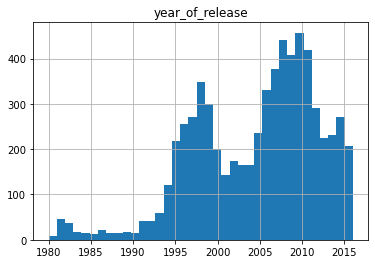

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,tbd
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,tbd
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,tbd
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,tbd
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,tbd
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,tbd
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,tbd
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,tbd
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,tbd


In [22]:
nan_rows = games[pd.isnull(games['user_score'])]
nan_rows.hist(column='year_of_release', bins=37)
plt.show()
nan_rows

Количество пропущенных значений в столбцах user_score и rating соизмеримо (40 %). В столбце user_score пропусков свыше 50 %.
Всплеск пропусков приходится на период после 1995 года.

Можно было бы говорить, что на момент выхода игр не существовало систем подсчета рейтингов и рейтинговых агентств, но это не так:
Entertainment Software Rating Board основана в 1994 году, а игра Super Mario Bros занесена в «Книгу рекордов Гиннесса». Причиной отсутствия информации скорее всего является ошибка сбора первоначальной информации.

 ### Замена типа данных в столбце year_of_release, critic_score и user_score

Заменим с помощью метода astype():
- вещественный тип данных в столбце `year_of_release` на целочисленный
- вещественный тип данных в столбце `critic_score` на целочисленный
- строковый тип данных в столбце `user_score` на вещественный

In [23]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,tbd
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,tbd


In [24]:
games[games['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E


Столбец `user_score` содержит аббревиатуру `tbd` которая не позволяет привести данные к типу `float`.
Аббревиатура TBD используется в сфере компьютерных игр и расшифровывается - To Be Determined - "Будет определено", то есть на текущий момент рейтинг не определен - меняем на NaN.

In [25]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)

In [26]:
games[games['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [27]:
games['year_of_release'] = games['year_of_release'].astype('int')
games['user_score'] = games['user_score'].astype('float')

In [28]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [29]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,tbd
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,tbd


In [30]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Проверяем
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)

### Удаление дубликатов.

In [31]:
'Полные дубликаты'
games.duplicated().sum()

0

Проверять на неявные дубликаты целесообразно только столбцы с типом данных `object`. Проверяем столбцы `name`, `platform`, `genre` и `rating`.

Меням стиль в столбцах `name`, `platform`, `genre` и `rating` для детальной проверки на неявные дубликаты.

In [32]:
print(f"Количество неявных дубликатов: {games['name'].nunique()}")
print(games.sort_values(by='name')['name'].unique())

Количество неявных дубликатов: 11426
[' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']


In [33]:
games['name'] = games['name'].str.lower()
print(f"Количество неявных дубликатов: {games['name'].nunique()}")
print(games.sort_values(by='name')['name'].unique())

Количество неявных дубликатов: 11426
[' beyblade burst' ' fire emblem fates' " frozen: olaf's quest" ...
 'zwei!!' 'zyuden sentai kyoryuger: game de gaburincho!!'
 '¡shin chan flipa en colores!']


In [34]:
print(f"Количество неявных дубликатов: {games['platform'].nunique()}")
print(games.sort_values(by='platform')['platform'].unique())

Количество неявных дубликатов: 31
['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']


In [35]:
games['platform'] = games['platform'].str.lower()
print(f"Количество неявных дубликатов: {games['platform'].nunique()}")
print(games.sort_values(by='platform')['platform'].unique())

Количество неявных дубликатов: 31
['2600' '3do' '3ds' 'dc' 'ds' 'gb' 'gba' 'gc' 'gen' 'gg' 'n64' 'nes' 'ng'
 'pc' 'pcfx' 'ps' 'ps2' 'ps3' 'ps4' 'psp' 'psv' 'sat' 'scd' 'snes' 'tg16'
 'wii' 'wiiu' 'ws' 'x360' 'xb' 'xone']


In [36]:
print(f"Количество неявных дубликатов: {games['genre'].nunique()}")
print(games.sort_values(by='genre')['genre'].unique())

Количество неявных дубликатов: 12
['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']


In [37]:
games['genre'] = games['genre'].str.lower()
print(f"Количество неявных дубликатов: {games['genre'].nunique()}")
print(games.sort_values(by='genre')['genre'].unique())

Количество неявных дубликатов: 12
['action' 'adventure' 'fighting' 'misc' 'platform' 'puzzle' 'racing'
 'role-playing' 'shooter' 'simulation' 'sports' 'strategy']


In [38]:
print(f"Количество неявных дубликатов: {games['rating'].nunique()}")
print(games.sort_values(by='rating')['rating'].unique())

Количество неявных дубликатов: 5
['E' 'E10+' 'M' 'T' 'tbd']


In [39]:
games['rating'] = games['rating'].str.lower()
print(f"Количество неявных дубликатов: {games['rating'].nunique()}")
print(games.sort_values(by='rating')['rating'].unique())

Количество неявных дубликатов: 5
['e' 'e10+' 'm' 't' 'tbd']


Полные и неявные дубликаты отсутствуют.

### Расчет суммы продаж во всех регионах 

In [40]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games = games.reindex(columns=['name',
                               'platform',
                               'year_of_release',
                               'genre',
                               'na_sales',
                               'eu_sales',
                               'jp_sales',
                               'other_sales',
                               'total_sales',
                               'critic_score',
                               'user_score',
                               'rating'])

In [41]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,tbd
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,tbd


### Вывод

При обработаке данных: 
- Произведено изменение стиля в наименованиях столбцов
- Произведено изменение стиля в данных содержащихся в столбцах name, platform, genre и rating
- Произведено удаление данные с незначительным количеством пропусков в столбцах name, genre и year_of_release 
- Произведена замена вещественного типа данных в столбце year_of_release на целочисленный и строкового типа данных в столбце user_score на вещественный
- Произведен анализ пропусков в столбцах critic_score, user_score и rating. В указанных столбцах находится информации с оценками игр и возрастными ограничениями. Существенная доля пропусков не позволяет удалить строки. С учетом существенности, заполнение пропущенных данных расчетными величинами приведет к критическому искажению информации. Пропуски оставлены без изменений

Количество пропущенных значений в столбцах user_score и rating соизмеримо (40 %). В столбце critic_score пропусков свыше 50 %. Всплеск пропусков приходится на период после 1995 года
Можно было бы говорить, что на момент выхода игр не существовало систем подсчета рейтингов и рейтинговых агентств, но это не так: Entertainment Software Rating Board основана в 1994 году, а игра Super Mario Bros занесена в «Книгу рекордов Гиннесса». Причиной отсутствия информации скорее всего является ошибка сбора первоначальной информации

- Выявлено что столбец user_score содержит аббревиатуру tbd которая не позволяет привести данные к типу float. Аббревиатура TBD используется в сфере компьютерных игр и расшифровывается - To Be Determined - "Будет определено", то есть на текущий момент рейтинг не определен. TBD заменен на NaN

- Выявлено что полные и неявные дубликаты отсутствуют.

- Расчитаны суммарные продажи во всех регионах с записью в отдельный столбец

## Исследовательский анализ данных

### Анализ выпуска игр по годам

In [42]:
games['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

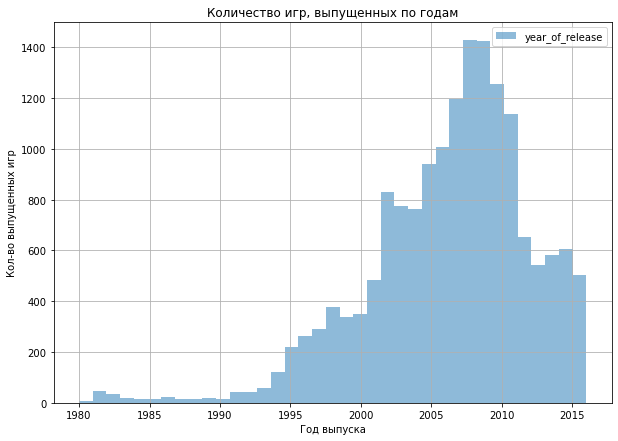

In [43]:
games.hist(column='year_of_release', bins=37, figsize=(10, 7), alpha=0.5, legend=True)
plt.title('Количество игр, выпущенных по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Кол-во выпущенных игр')
plt.show()

До 1994 года выпускалось меньше 100 игр в год. Динамичный рост начинается с 1995 года. Спад с 2010 года обусловлен развитием мобильных устройств/телефонов с возможностью установки мобильных приложений/игр. Появилась новая ниша игровой индустрии.

### Анализ продаж по платформам

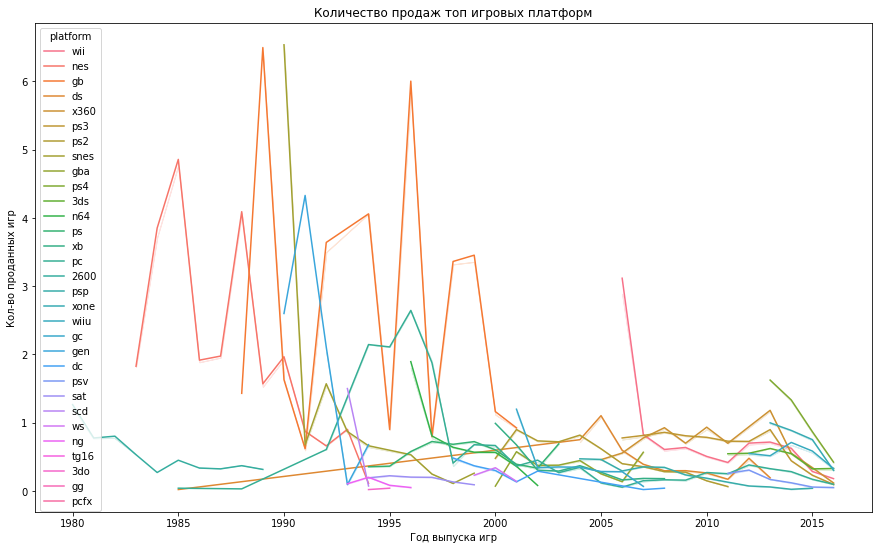

In [44]:
plt.figure(figsize=(15,9))
sns.lineplot(x='year_of_release',y='total_sales', hue='platform', ci=0, data=games)
plt.title('Количество продаж топ игровых платформ')
plt.xlabel('Год выпуска игр')
plt.ylabel('Кол-во проданных игр')
plt.show()

In [45]:
ds = games[games['platform'] == 'ds']
ds['year_of_release'].value_counts()

2008    492
2009    403
2007    376
2010    323
2006    201
2011    153
2005    118
2004     23
2012     23
2013      8
1985      1
Name: year_of_release, dtype: int64

DS вышла в 2004 году. 1985 - это точно выброс.

In [46]:
ds[ds['year_of_release']==1985]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
15957,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,0.02,NaN,NaN,tbd


Игра strongest tokyo university shogi ds вышла в 2010 году.

In [47]:
games.loc[15957, 'year_of_release'] = 2010

In [48]:
ds = games[games['platform'] == 'ds']
ds['year_of_release'].value_counts()

2008    492
2009    403
2007    376
2010    324
2006    201
2011    153
2005    118
2004     23
2012     23
2013      8
Name: year_of_release, dtype: int64

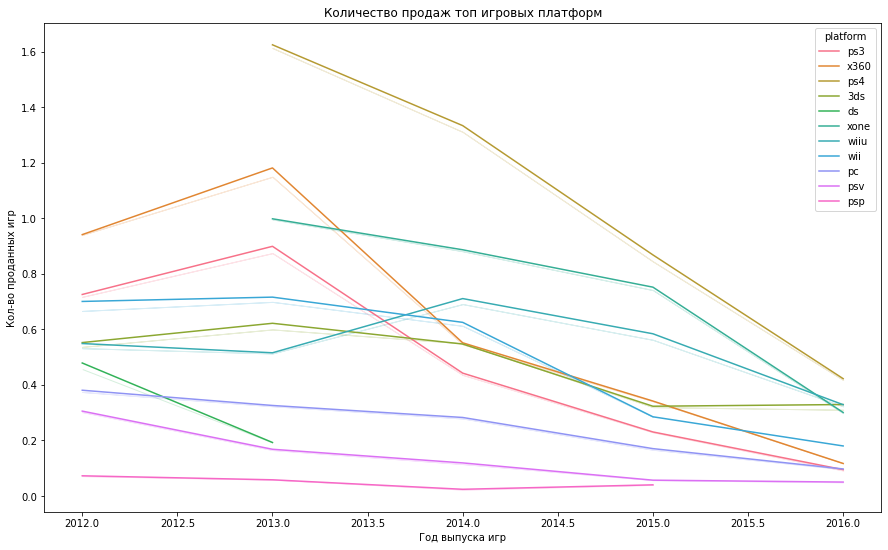

In [49]:
games_2012 = games.query('year_of_release >= 2012')
plt.figure(figsize=(15,9))
sns.lineplot(x='year_of_release',y='total_sales', hue='platform', ci=0, data=games_2012)
plt.title('Количество продаж топ игровых платформ')
plt.xlabel('Год выпуска игр')
plt.ylabel('Кол-во проданных игр')
plt.show()

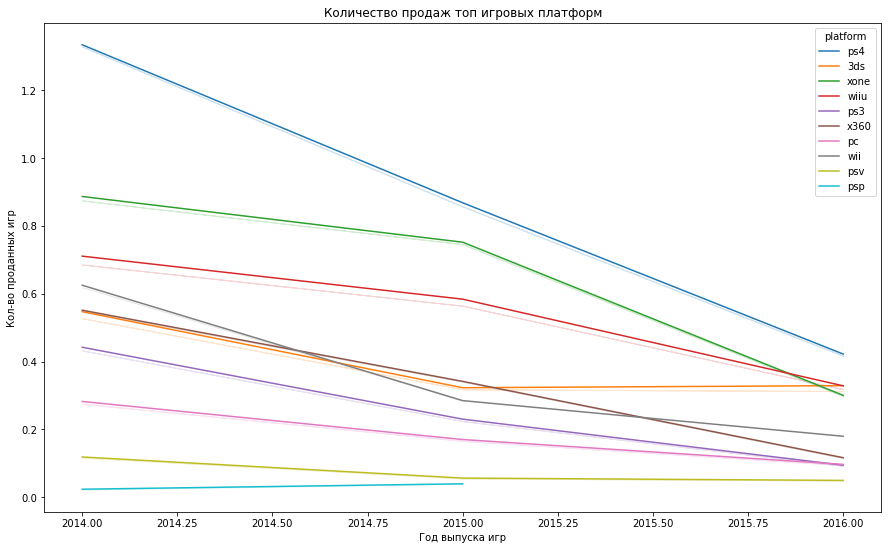

In [50]:
games_2014 = games.query('year_of_release >= 2014')
plt.figure(figsize=(15,9))
sns.lineplot(x='year_of_release',y='total_sales', hue='platform', ci=0, data=games_2014)
plt.title('Количество продаж топ игровых платформ')
plt.xlabel('Год выпуска игр')
plt.ylabel('Кол-во проданных игр')
plt.show()

Срок существования игровых платформ составляет порядка 10 лет.

Пики популярности каждой платформы различны по годам и зависят от рекламной компанией при выходе новой платформы, количеством предлагаемых игр на платформе и предлагаемых эксклюзивов.

Среднесрочное планирование — 3-5 лет. В крупных компаниях определяет соотношение необходимых ресурсов для выпуска нужного объёма продукции.

С учетом выше указанного в дальнейшем оперируем актуальным периодом 2014-2016 гг. (3 года)

In [51]:
df = games.query('year_of_release >= 2014')

In [52]:
print(df['platform'].value_counts().head())


top_platform = (df
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
    .head()
)
top_platform

ps4     376
psv     295
xone    228
ps3     219
3ds     212
Name: platform, dtype: int64


,platform,total_sales
0,ps4,288.15
1,xone,140.36
2,3ds,86.68
3,ps3,68.18
4,x360,48.22


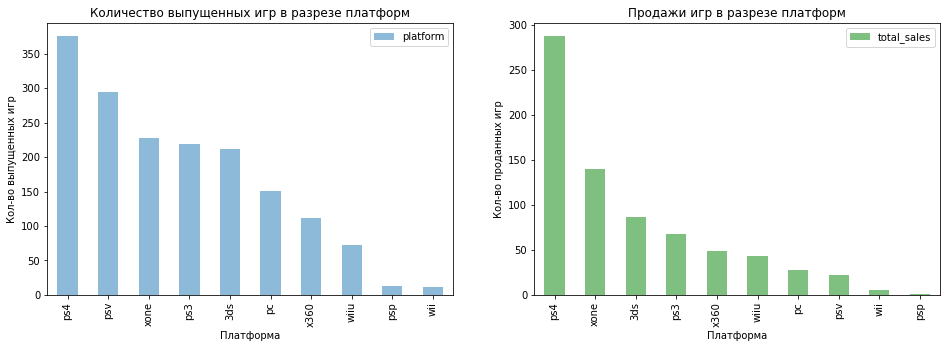

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

df['platform'].value_counts().plot(kind='bar', alpha=0.5, legend=True, ax=axes[0])

(df
     .pivot_table(index='platform', values='total_sales', aggfunc='sum')
     .sort_values(by='total_sales', ascending=False) 
     .plot(kind='bar', color= 'green', alpha=0.5, legend=True, ax=axes[1]) 
)

axes[0].set_title('Количество выпущенных игр в разрезе платформ')
axes[0].set_xlabel('Платформа')
axes[0].set_ylabel('Кол-во выпущенных игр')
axes[1].set_title('Продажи игр в разрезе платформ')
axes[1].set_xlabel('Платформа')
axes[1].set_ylabel('Кол-во проданных игр')
plt.show()

Логично, чем больше на платформе выходит игр, тем больше продаж.

Топ 5  платформ по продажам:
- ps4
- xone
- 3ds
- pc3
- x360

Рассмотрим продажи по годам - Топ 5

In [54]:
df_top = df.query('platform in @top_platform.platform')
df_top

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,tbd
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,m
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,11.68,NaN,NaN,tbd
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,e
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,7.98,NaN,NaN,tbd
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,metal gear solid v: the definitive experience,xone,2016,action,0.01,0.00,0.00,0.00,0.01,NaN,NaN,m
16674,tsukigime ranko's longest day,ps3,2014,action,0.00,0.01,0.00,0.00,0.01,NaN,NaN,tbd
16677,aikatsu stars! my special appeal,3ds,2016,action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,tbd
16691,dynasty warriors: eiketsuden,ps3,2016,action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,tbd


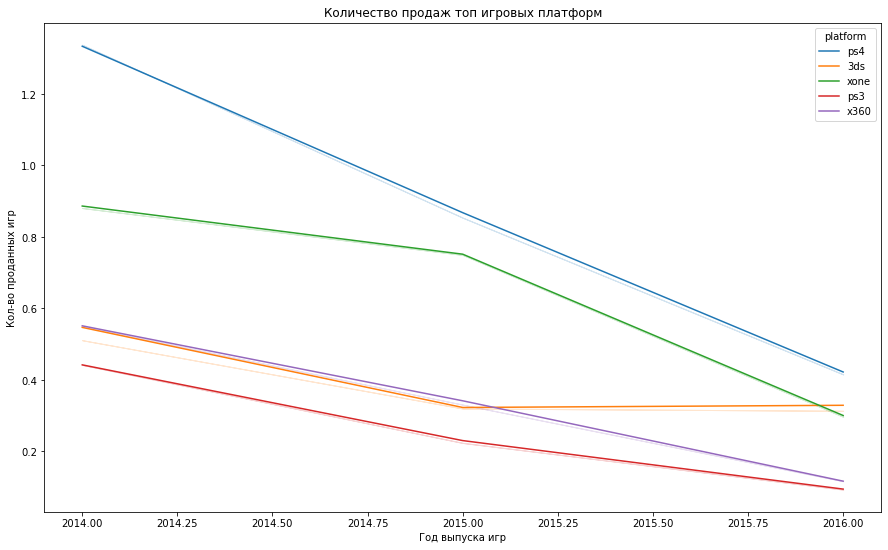

In [55]:
plt.figure(figsize=(15,9))
sns.lineplot(x='year_of_release',y='total_sales', hue='platform', ci=0, data=df_top)
plt.title('Количество продаж топ игровых платформ')
plt.xlabel('Год выпуска игр')
plt.ylabel('Кол-во проданных игр')
plt.show()

Лидерами продаж последних лет являются: ps4, xone, 3ds, ps3, X360

С 2013 года прослеживается динамика снижения продаж на всех существующих платформах.

In [56]:
# check
df.platform.unique()

array(['ps4', '3ds', 'xone', 'wiiu', 'ps3', 'x360', 'pc', 'wii', 'psv',
       'psp'], dtype=object)

In [57]:
# check
games.platform.unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

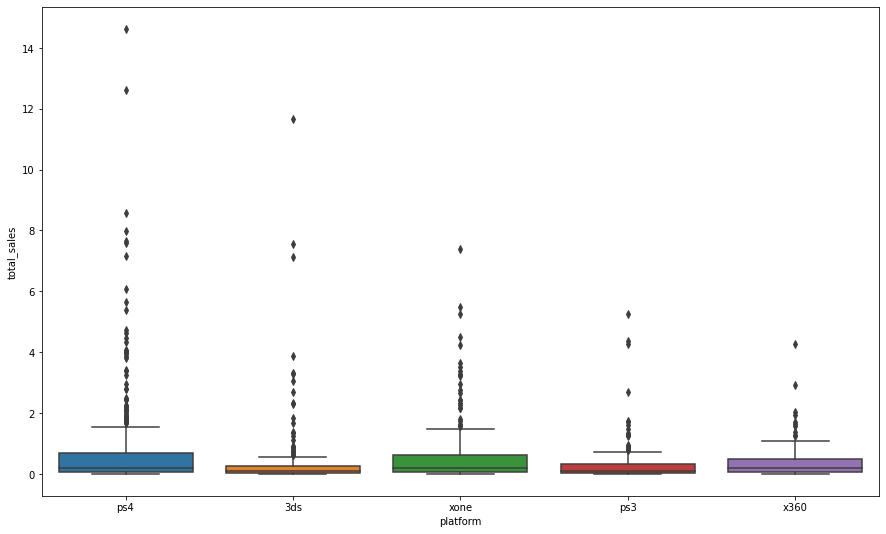

In [58]:
plt.figure(figsize=(15,9))
sns.boxplot(x='platform', y='total_sales', data=df_top)
plt.show()

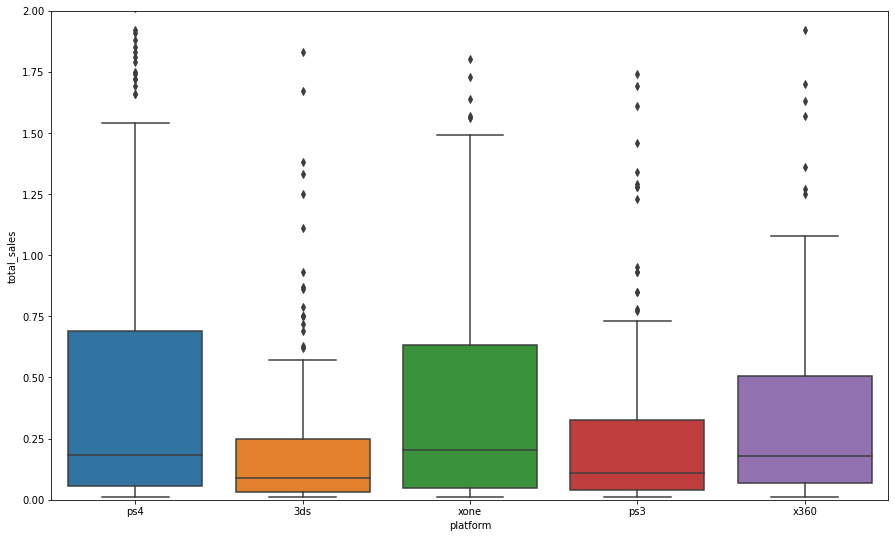

In [59]:
plt.figure(figsize=(15,9))

sns.boxplot(x='platform', y='total_sales', data=df_top)
plt.ylim(0, 2)
plt.show()

In [60]:
df_top.query('platform == "ps4" and total_sales > 6')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,tbd
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,m
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,e
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,7.98,NaN,NaN,tbd
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,7.66,83.0,5.7,m
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,7.60,85.0,5.0,e
105,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,7.17,87.0,6.5,m
143,fifa 15,ps4,2014,sports,0.80,4.33,0.05,0.90,6.08,82.0,5.7,e


In [61]:
df_top.query('platform == "3ds" and total_sales > 6')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,11.68,NaN,NaN,tbd
96,super smash bros. for wii u and 3ds,3ds,2014,fighting,3.27,1.37,2.43,0.48,7.55,NaN,NaN,tbd
108,pokemon sun/moon,3ds,2016,role-playing,2.98,1.45,2.26,0.45,7.14,NaN,NaN,tbd


In [62]:
df_top.query('platform == "xone" and total_sales > 6')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
99,call of duty: black ops 3,xone,2015,shooter,4.59,2.11,0.01,0.68,7.39,NaN,NaN,tbd


Медиана продаж проходит у каждой платформы по разному.

Больше всех продаж у PS4, затем XONE, после X360, PS3 и 3DS на последнем месте.

На современных платформах выделяются топовые игры.

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами для всех платформ. 

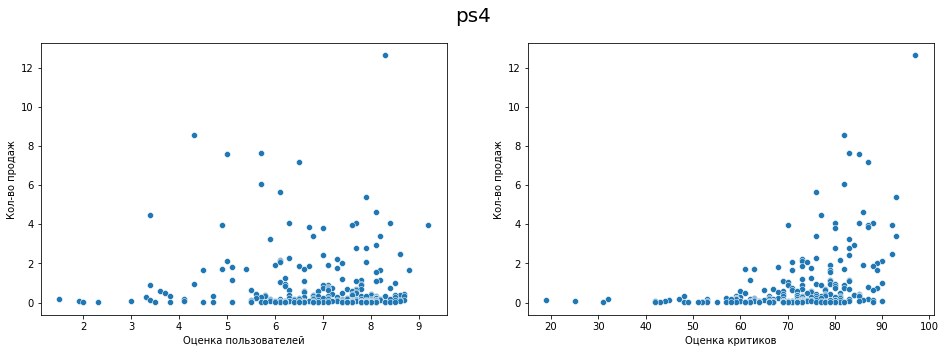

Корреляция между оценкой пользователей и продажами -0.040131589472697356
Корреляция между оценкой критиков и продажами 0.40266141068104083


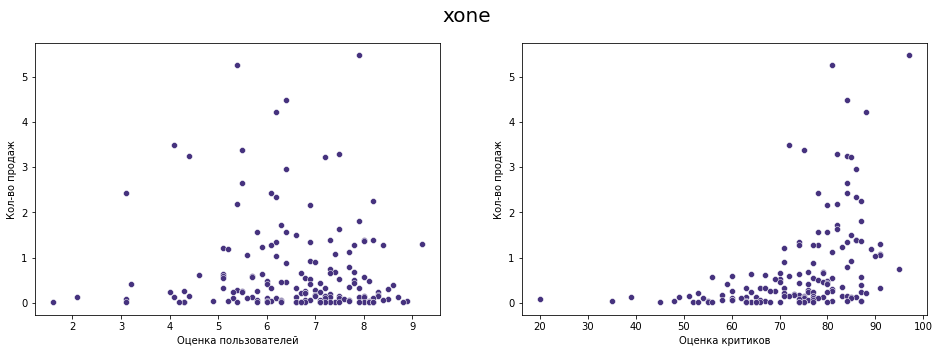

Корреляция между оценкой пользователей и продажами -0.0703839280647581
Корреляция между оценкой критиков и продажами 0.42867694370333226


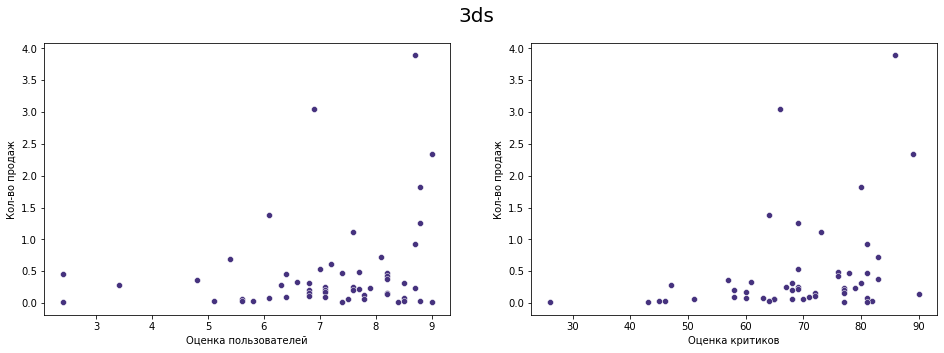

Корреляция между оценкой пользователей и продажами 0.2151932718527028
Корреляция между оценкой критиков и продажами 0.314117492869051


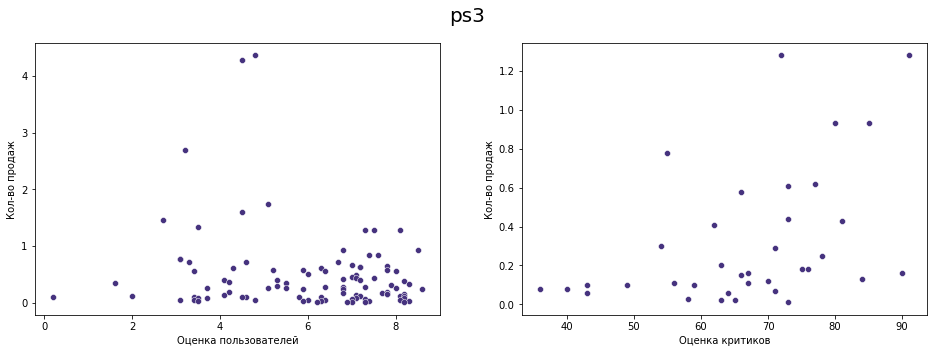

Корреляция между оценкой пользователей и продажами -0.16676141347662118
Корреляция между оценкой критиков и продажами 0.44657460493190704


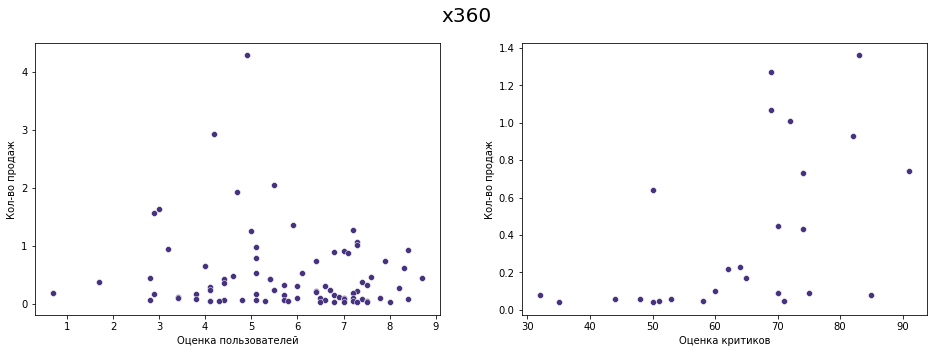

Корреляция между оценкой пользователей и продажами -0.138444570945665
Корреляция между оценкой критиков и продажами 0.5257228356581523


In [63]:
def critic_range(name_platform):
    platform = df_top[df_top['platform']==name_platform]
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    sns.set_palette('viridis')
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=axes[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=axes[1])
    fig.suptitle(name_platform, fontsize=20)
    axes[0].set(xlabel='Оценка пользователей')
    axes[1].set(xlabel='Оценка критиков')
    axes[0].set(ylabel='Кол-во продаж')
    axes[1].set(ylabel='Кол-во продаж')
    plt.show()
    
    user_corr = platform['user_score'].corr(platform['total_sales'])
    critic_corr = platform['critic_score'].corr(platform['total_sales'])
    print('Корреляция между оценкой пользователей и продажами', user_corr)
    print('Корреляция между оценкой критиков и продажами', critic_corr)
    
list_platforms = ['ps4', 'xone', '3ds', 'ps3', 'x360']
for platform in list_platforms:
    critic_range(platform)  

In [64]:
def critic_range(name_platform):
    platform = df_top[df_top['platform']==name_platform]

    print(name_platform)
    print('--------------------')
    user_corr = platform['user_score'].corr(platform['total_sales'])
    critic_corr = platform['critic_score'].corr(platform['total_sales'])
    print('Корреляция между оценкой пользователей и продажами', user_corr)
    print('Корреляция между оценкой критиков и продажами', critic_corr)
    print('')
    
list_platforms = ['ps4', 'xone', '3ds', 'ps3', 'x360']
for platform in list_platforms:
    critic_range(platform)  

ps4
--------------------
Корреляция между оценкой пользователей и продажами -0.040131589472697356
Корреляция между оценкой критиков и продажами 0.40266141068104083

xone
--------------------
Корреляция между оценкой пользователей и продажами -0.0703839280647581
Корреляция между оценкой критиков и продажами 0.42867694370333226

3ds
--------------------
Корреляция между оценкой пользователей и продажами 0.2151932718527028
Корреляция между оценкой критиков и продажами 0.314117492869051

ps3
--------------------
Корреляция между оценкой пользователей и продажами -0.16676141347662118
Корреляция между оценкой критиков и продажами 0.44657460493190704

x360
--------------------
Корреляция между оценкой пользователей и продажами -0.138444570945665
Корреляция между оценкой критиков и продажами 0.5257228356581523



Продажи в большей степени зависят от оценки критиков. 

Корреляция между оценкой критиков и продажами везде положительна. Лидеры:
- 1. x360
- 2. ps3
- 3. xone

Корреляция между оценкой пользователей и продажами везде кроме 3ds отрицательная. Лидеры:
- 1. 3ds (положительная)
- 2. ps3
- 3. x360

Высокая пользовательская оценка игры не может являться триггером для принятия решения о ее приобретении, скорее наоборот.

### Анализ игр по жанрам

In [65]:
df_top['genre'].value_counts()

action          422
role-playing    140
sports          136
shooter         103
adventure        95
misc             75
racing           52
fighting         49
platform         26
simulation       23
strategy         16
puzzle            9
Name: genre, dtype: int64

In [66]:
genre_df = (df_top
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
    .head(15)
)
genre_df

,genre,total_sales
0,action,175.17
1,shooter,159.68
2,sports,105.88
3,role-playing,88.95
4,misc,26.32
5,fighting,21.55
6,racing,19.69
7,adventure,14.47
8,platform,10.97
9,simulation,6.49


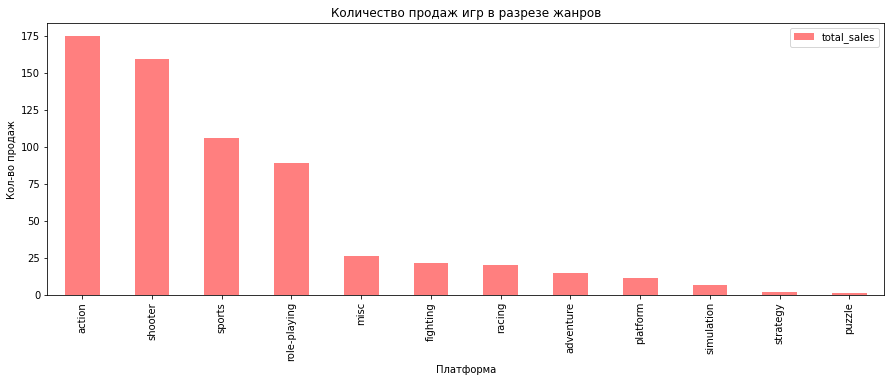

In [67]:
(df_top
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', color= 'red', alpha=0.5, legend=True, figsize=(15, 5))
)

plt.title('Количество продаж игр в разрезе жанров')
plt.xlabel('Платформа')
plt.ylabel('Кол-во продаж')

plt.show()

Больше всего выпускаются и соотвественнно больше продаются игры жанра action. Игры жанра puzzle показывают наихудший результат.	

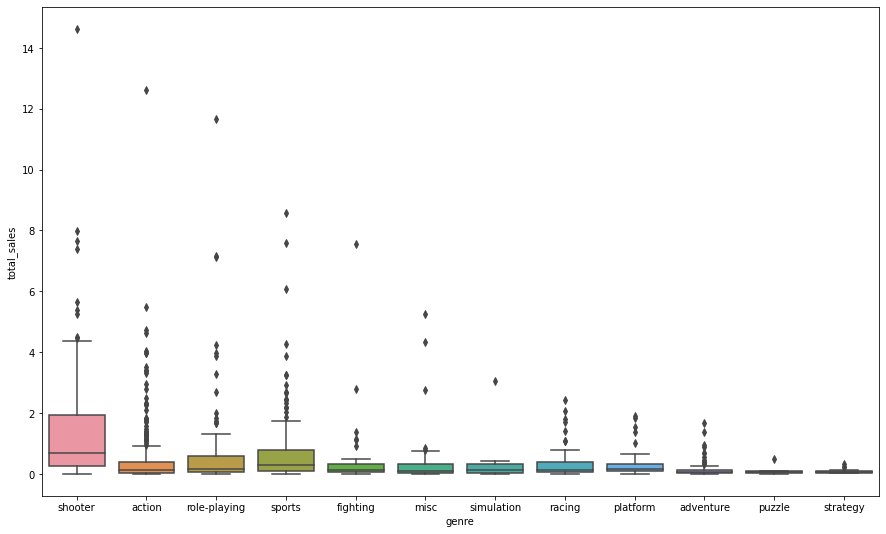

In [68]:
plt.figure(figsize=(15,9))
sns.boxplot(x='genre', y='total_sales', data=df_top)
plt.show()

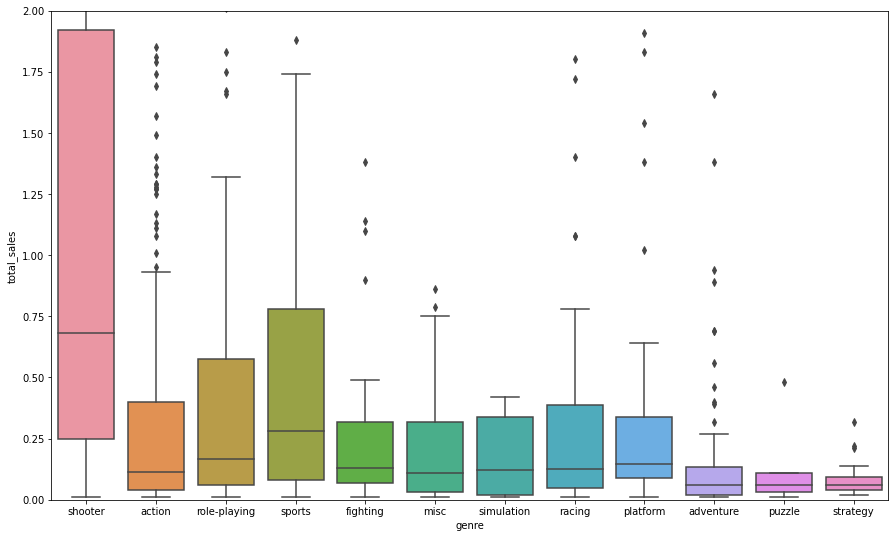

In [69]:
plt.figure(figsize=(15,9))

sns.boxplot(x='genre', y='total_sales', data=df_top)
plt.ylim(0, 2)
plt.show()

Лидирующие жанры по медийным значениям являются:
- 1. shooter
- 2. sports
- 3. role-playing

При этом данные жанры демонстрируют аномальные (топовые) игры по продажам, большой массив второго и третьего квартиля - что говорит о успешности. Жанр action с трудом входит в пятерку.	

### Вывод

- До 1994 года выпускалось меньше 100 игр в год. Динамичный рост начинается с 1995 года. Спад с 2010 года обусловлен развитием мобильных устройств/телефонов с возможностью установки мобильных приложений/игр. Появилась новая ниша игровой индустрии.
- Чем больше на платформе выходит игр, тем больше продаж.
- Срок существования игровых платформ составляет порядка 10 лет. Пики популярности каждой платформы различны по годам и зависят от рекламной компанией при выходе новой платформы, количеством предлагаемых игр на платформе и предлагаемых эксклюзивов.
- Лидерами продаж последних лет являются: ps4, xone, 3ds, ps3, x360.
- С 2013 года прослеживается динамика снижения продаж на всех существующих платформах. 
- Актуальный период 2014-2016 гг. (3 лет) является наиболее предпочтительным для анализа продаж. 
- Продажи в большей степени зависят от оценки критиков. Корреляция между оценкой критиков и продажами везде положительна (лидеры: x360, ps3, xone). Корреляция между оценкой пользователей и продажами везде кроме 3ds отрицательная (лидеры: 3ds, ps3,x360). Высокая пользовательская оценка игры не может являться триггером для принятия решения о ее приобретении, скорее наоборот.
- Больше всего выпускаются и соотвественнно больше продаются игры жанра action. Игры жанра puzzle показывают наихудший результат.
- Лидирующими жанрами с учетом медийных значений являются  shooter, sports и role-playing. При этом данные жанры демонстрируют как аномальные (топовые) игры по продажам, так и большой массив второго и третьего квартиля - что говорит о успешности продаж. Жанр action с трудом входит в пятерку.	

## Портрет пользователя

### Портрет пользователя для региона North America (NA)

In [70]:
def region_sale(row):
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    for selection, ax in zip(list(['platform','genre','rating']),axes.flatten()[:3]):
        slice = df_top.pivot_table(index=selection, values=row, aggfunc='sum'
        ).sort_values(by=row, ascending=False).reset_index().head(5)
        print(slice)
        print('--------------------------')
        sns.set_palette('RdBu')
        
        axes[0].set_title('По платформам')
           
        axes[1].set_title('По жанрам')
         
        axes[2].set_title('По рейтингам')
           
        fig.suptitle('Топ 5', fontsize=20)
        
        sns.barplot(data=slice, x=selection, y=row, ax=ax)
plt.show()

In [71]:
def region_sale_2016(row):
    df_last_year = df_top[df_top['year_of_release'] == 2016]
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    for selection, ax in zip(list(['platform','genre','rating']),axes.flatten()[:3]):
        slice = df_last_year.pivot_table(index=selection, values=row, aggfunc='sum'
        ).sort_values(by=row, ascending=False).reset_index().head(5)
        print(slice)
        print('--------------------------')
        sns.set_palette('RdBu')
                
        axes[0].set_title('По платформам')
        
        axes[1].set_title('По жанрам')
 
        axes[2].set_title('По рейтингам')
 
        fig.suptitle('Топ 5', fontsize=20)
        
        sns.barplot(data=slice, x=selection, y=row, ax=ax)
        
plt.show()

  platform  na_sales
0      ps4     98.61
1     xone     81.27
2     x360     28.30
3      3ds     22.64
4      ps3     22.05
--------------------------
          genre  na_sales
0       shooter     75.10
1        action     64.87
2        sports     45.41
3  role-playing     30.46
4          misc     11.19
--------------------------
  rating  na_sales
0      m     90.82
1    tbd     59.98
2      e     42.38
3      t     34.41
4   e10+     25.28
--------------------------


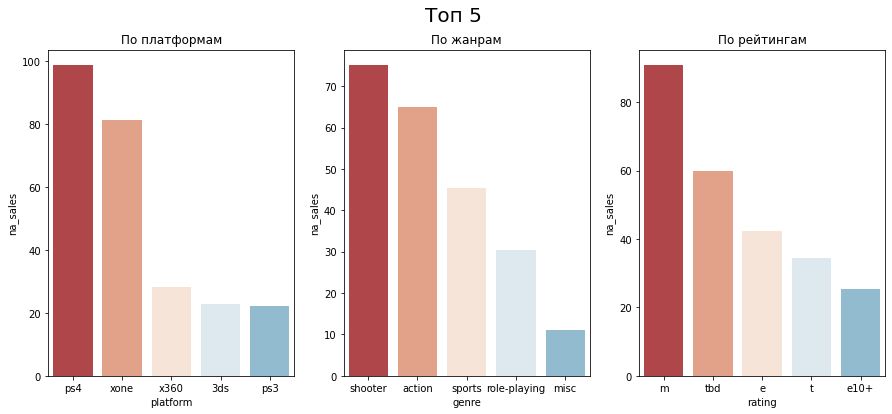

In [72]:
region_sale('na_sales')

  platform  na_sales
0      ps4     21.49
1     xone     14.27
2      3ds      4.14
3     x360      0.69
4      ps3      0.67
--------------------------
          genre  na_sales
0       shooter     15.30
1        action      8.23
2        sports      7.53
3  role-playing      5.50
4      fighting      1.34
--------------------------
  rating  na_sales
0      m     15.06
1    tbd      8.10
2      t      7.80
3      e      7.70
4   e10+      2.60
--------------------------


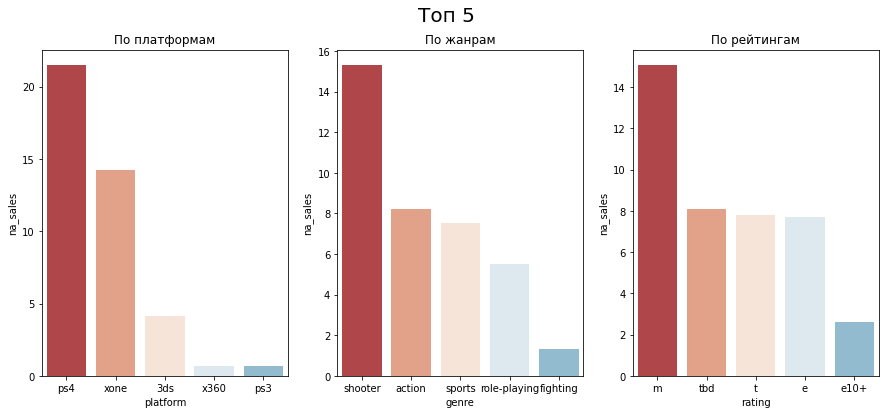

In [73]:
region_sale_2016('na_sales')

**В Северной Америке**

**За период 2014-2016 гг:**
- Топ самый популярных платформ: ps4, xone, 3ds, x360, ps3.
- Топ самых популярных жанров: shooter, action, sports, role-playing, fighting.
- По рейтингам на первом месте игры для взрослых, на втором месте  tbd - "Будет определено", на третьем месте для подростов.

**За 2016 г.:**
- Топ самый популярных платформ, жанров и рейтингов аналогичен 2014-2016 гг.

In [74]:
df_top['platform'].value_counts()

ps4     376
xone    228
ps3     219
3ds     212
x360    111
Name: platform, dtype: int64

In [75]:
df_top['rating'].value_counts()

tbd     459
t       194
m       193
e       166
e10+    134
Name: rating, dtype: int64

In [76]:
df_top['genre'].value_counts()

action          422
role-playing    140
sports          136
shooter         103
adventure        95
misc             75
racing           52
fighting         49
platform         26
simulation       23
strategy         16
puzzle            9
Name: genre, dtype: int64

In [77]:
genre = {
    'puzzle': 'other',
    'strategy': 'other',  
    'simulation': 'other',    
    'platform': 'other'}
df['genre'] = df['genre'] .replace(genre)

In [78]:
# check
na_user = df_top.pivot_table(
    index = 'platform',
    values = 'na_sales',
    aggfunc = 'sum').sort_values('na_sales', ascending=False).head(5).reset_index()

In [79]:
# check
# добавление строки

na_user = (
            na_user.append({'platform': 'Other', 'na_sales': df_top.na_sales.sum() 
                       - na_user.na_sales.sum()}, ignore_index= True)
         )

na_user

,platform,na_sales
0,ps4,98.61
1,xone,81.27
2,x360,28.30
3,3ds,22.64
4,ps3,22.05
5,Other,0.00


In [80]:
# check
pd.options.display.float_format = '{:.2f}'.format
na_user

,platform,na_sales
0,ps4,98.61
1,xone,81.27
2,x360,28.30
3,3ds,22.64
4,ps3,22.05
5,Other,0.00


### Портрет пользователя для региона European Union (EU)

  platform  eu_sales
0      ps4    130.04
1     xone     46.25
2      ps3     25.54
3      3ds     16.12
4     x360     15.49
--------------------------
          genre  eu_sales
0        action     65.79
1       shooter     60.59
2        sports     43.88
3  role-playing     24.44
4        racing     11.36
--------------------------
  rating  eu_sales
0      m     85.02
1    tbd     52.76
2      e     49.46
3      t     28.08
4   e10+     18.12
--------------------------


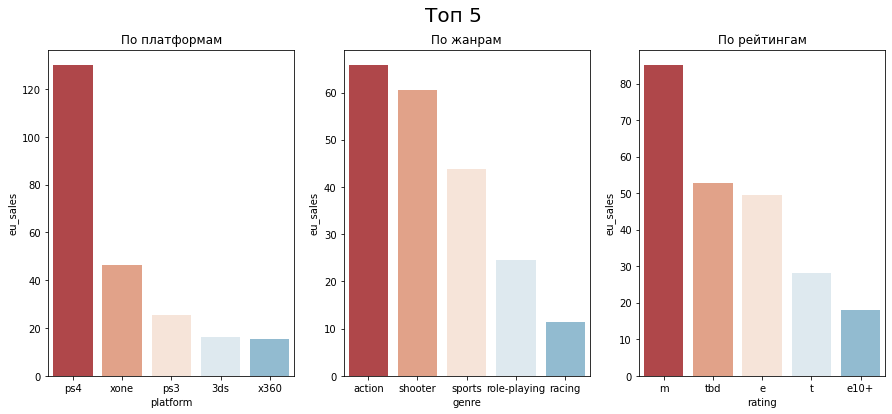

In [81]:
region_sale('eu_sales')

  platform  eu_sales
0      ps4     31.78
1     xone      9.63
2      3ds      2.33
3      ps3      1.26
4     x360      0.71
--------------------------
          genre  eu_sales
0       shooter     14.82
1        sports     11.80
2        action      9.54
3  role-playing      3.73
4        racing      1.65
--------------------------
  rating  eu_sales
0      m     15.43
1      e     12.53
2      t      8.42
3    tbd      6.68
4   e10+      2.65
--------------------------


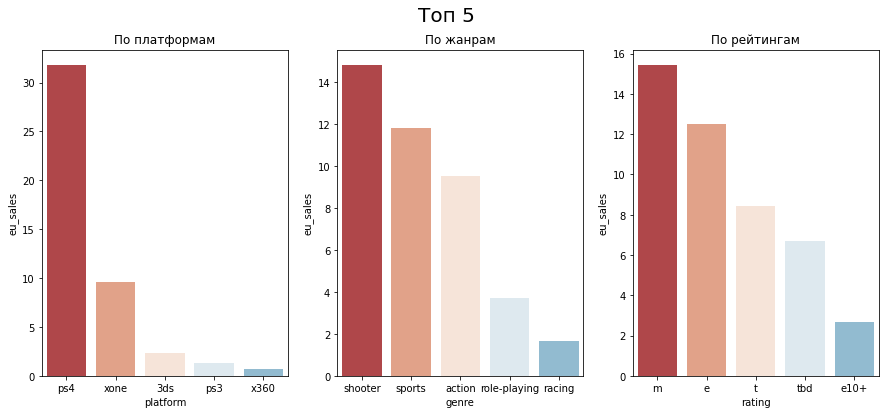

In [82]:
region_sale_2016('eu_sales')

**В Европе**

**За период 2014-2016 гг:**
- Топ самый популярных платформ: ps4, xone, ps3,  3ds, x360.
- Топ самых популярных жанров: action, shooter, sports, role-playing, racing.
- По рейтингам на первом месте игры для взрослых, на втором месте tbd - "Будет определено", на третьем месте для всех.

**За 2016 г. произошли изменения:**
- Топ самый популярных платформ: ps4, xone,  3ds, ps3, x360.
- Топ самых популярных жанров: shooter, sports, action, role-playing, racing.
- По рейтингам на первом месте игры для взрослых, на втором месте для всех, на третьем месте для подростов.

### Портрет пользователя для региона Japan (JP)

  platform  jp_sales
0      3ds     44.24
1      ps4     15.02
2      ps3     11.22
3     xone      0.32
4     x360      0.08
--------------------------
          genre  jp_sales
0  role-playing     26.21
1        action     23.79
2      fighting      4.93
3       shooter      3.33
4          misc      2.90
--------------------------
  rating  jp_sales
0    tbd     45.65
1      t     10.36
2      m      7.03
3      e      5.47
4   e10+      2.37
--------------------------


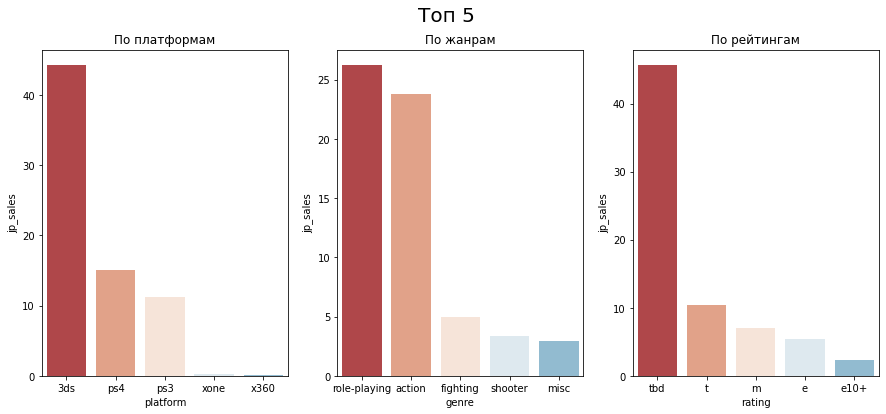

In [83]:
region_sale('jp_sales')

  platform  jp_sales
0      3ds      8.03
1      ps4      5.74
2      ps3      1.30
3     xone      0.01
4     x360      0.00
--------------------------
          genre  jp_sales
0  role-playing      5.61
1        action      5.30
2       shooter      0.99
3     adventure      0.75
4        sports      0.71
--------------------------
  rating  jp_sales
0    tbd     11.09
1      t      1.69
2      m      1.17
3      e      1.02
4   e10+      0.11
--------------------------


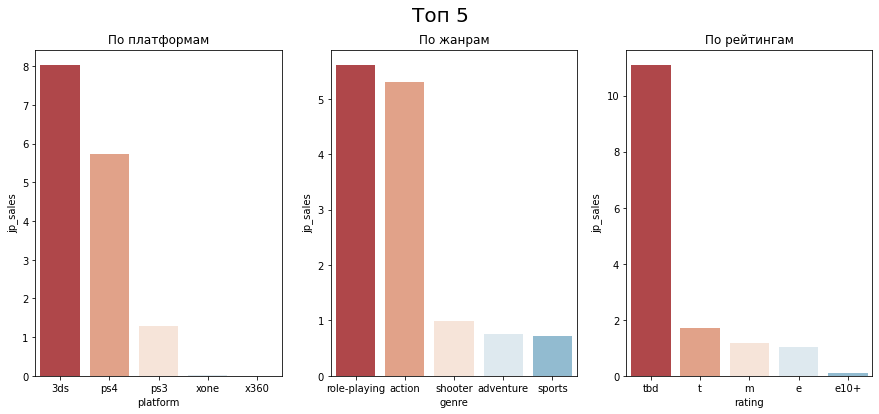

In [84]:
region_sale_2016('jp_sales')

**В Японии**

**За период 2014-2016 гг:**
- Топ самый популярных платформ: 3ds, ps4, ps3, xone, x360.    
- Топ самых популярных жанров: role-playing, action, fighting, shooter, misc.
- По рейтингам на первом месте игры tbd - "Будет определено", на втором месте для подростов , на третьем месте для взрослых.
  platform  jp_sales

**За 2016 г.:**
- Топ самый популярных платформ  аналогичен 2014-2016 гг.: 3ds, ps4, ps3, xone, x360. 
- Топ самых популярных жанров: role-playing, action, shooter, adventure, sports.
- По рейтингам аналогичен 2014-2016 гг.: на первом месте игры tbd - "Будет определено", на втором месте для подростов , на третьем месте для взрослых.

### Вывод

**В Северной Америке**

За период 2014-2016 гг:
- Топ самый популярных платформ: ps4, xone, 3ds, x360, ps3.
- Топ самых популярных жанров: shooter, action, sports, role-playing, fighting.
- По рейтингам на первом месте игры для взрослых, на втором месте tbd - "Будет определено", на третьем месте для подростов.
За 2016 г. топ самый популярных платформ, жанров и рейтингов аналогичен 2014-2016 гг.

**В Европе**

За период 2014-2016 гг:

- Топ самый популярных платформ: ps4, xone, ps3, 3ds, x360.
- Топ самых популярных жанров: action, shooter, sports, role-playing, racing.
- По рейтингам на первом месте игры для взрослых, на втором месте tbd - "Будет определено", на третьем месте для всех.

За 2016 г. произошли изменения:

- Топ самый популярных платформ: ps4, xone, 3ds, ps3, x360.
- Топ самых популярных жанров: shooter, sports, action, role-playing, racing.
- По рейтингам на первом месте игры для взрослых, на втором месте для всех, на третьем месте для подростов.

**В Японии**

За период 2014-2016 гг:

- Топ самый популярных платформ: 3ds, ps4, ps3, xone, x360.
- Топ самых популярных жанров: role-playing, action, fighting, shooter, misc.
- По рейтингам на первом месте игры tbd - "Будет определено", на втором месте для подростов , на третьем месте для взрослых. 

За 2016 г.:

- Топ самый популярных платформ и рейтинг аналогичен 2014-2016 гг.
- Топ самых популярных жанров изменился: role-playing, action, shooter, adventure, sports.

## Проверка гипотез

In [85]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,82.54,76.00,8.00,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,tbd
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,35.52,82.00,8.30,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,32.77,80.00,8.00,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,tbd
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,tbd
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,tbd
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,tbd
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,tbd


### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [86]:
xone = games.query('(platform == "xone") & (year_of_release >= 2014)')
pc = games.query('(platform == "pc") & (year_of_release >= 2014)')

In [87]:
xone = xone['user_score'].dropna() 
pc = pc['user_score'].dropna() 

In [88]:
print('Средний пользовательский рейтинг платформы Xbox One:', xone.describe()['mean'])
print('Средний пользовательский рейтинг платформы PC:', pc.describe()['mean'])

Средний пользовательский рейтинг платформы Xbox One: 6.594545454545453
Средний пользовательский рейтинг платформы PC: 6.298360655737703


In [89]:
print('Количество строк с рейтингом платформы Xbox One:', xone.count())
print('Количество строк с рейтингом платформы PC:', pc.count())
print('Дисперсия рейтинга платформы Xbox One:', np.var(xone))
print('Дисперсия рейтинга платформы PC:', np.var(pc))

Количество строк с рейтингом платформы Xbox One: 165
Количество строк с рейтингом платформы PC: 122
Дисперсия рейтинга платформы Xbox One: 1.87954600550964
Дисперсия рейтинга платформы PC: 2.877374361730719


Используем специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам -scipy.stats.ttest_ind (array1, array2, equal_var). 

Так как выборка разного размера и дисперсии у генеральных совокупностей разные — укажем equal_var = False при вызове метода scipy.stats.ttest_ind().

`Нулевая гипотеза` -  Средние пользовательские рейтинги платформ Xbox One и PC равны

`Альтернативная гипотеза` - Средние пользовательские рейтинги платформ Xbox One и PC различаются

Уровень значимости для исследования выбирается до сбора данных и обычно устанавливается на уровне 5% - его и будем использовать.

In [90]:
alpha = .05
results = st.ttest_ind(
    xone,
    pc,
    equal_var = False)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Подтверждаем нулевую гипотезу - С вероятностью в 11% и более можно получить различность средних пользовательских рейтингов платформ Xbox One и PC.

Альтернативная гипотеза отвергнута

In [91]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [92]:
action = games.query('(genre == "action") & (year_of_release >= 2014)')
sports = games.query('(genre == "sports") & (year_of_release >= 2014)')

In [93]:
action = action['user_score'].dropna() 
sports = sports['user_score'].dropna() 

In [94]:
print('Средний пользовательский рейтинг жанра Action:', action.describe()['mean'])
print('Средний пользовательский рейтинг жанра Sports:', sports.describe()['mean'])

Средний пользовательский рейтинг жанра Action: 6.760606060606054
Средний пользовательский рейтинг жанра Sports: 5.225196850393697


In [95]:
print('Количество строк с рейтингом жанра Action:', action.count())
print('Количество строк с рейтингом жанра Sports:', sports.count())
print('Дисперсия рейтинга с жанром Action:', np.var(action))
print('Дисперсия рейтинга с жанром Sports:', np.var(sports))

Количество строк с рейтингом жанра Action: 297
Количество строк с рейтингом жанра Sports: 127
Дисперсия рейтинга с жанром Action: 1.8920844811753907
Дисперсия рейтинга с жанром Sports: 3.419837559675118


Используем специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам -scipy.stats.ttest_ind (array1, array2, equal_var). 

Так как выборка разного размера и дисперсии у генеральных совокупностей разные — укажем equal_var = False при вызове метода scipy.stats.ttest_ind().

Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports равны

Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action и Sports различаются

Уровень значимости для исследования выбирается до сбора данных и обычно устанавливается на уровне 5% - его и будем использовать.

In [96]:
alpha = .05
results = st.ttest_ind(
    action,
    sports,
    equal_var = False)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Принимаем альтернативную гипотезу - Средние пользовательские рейтинги жанров Action и Sports различаются

Нулевая гипотеза отвергнута

### Вывод

С вероятностью в 11% и более можно получить различность средних пользовательских рейтингов платформ Xbox One и PC

Средние пользовательские рейтинги жанров Action и Sports различаются

## Общий вывод

В целях Выявление закономерностей, определяющих успешность компьютерных игр произведен анализ базы данных.


В процессе анализа базы данных произведены дополнительные расчеты, которые позволяют судить о том, что средние пользовательские рейтинги платформ Xbox One и PC с вероятностью в 11% и более можно получить случайно, а средние пользовательские рейтинги жанров Action и Sports различаются.

При обработаке данных:

- Произведено изменение стиля в наименованиях и содержаниях столбцов
- Произведено удаление данные с незначительным количеством пропусков в столбцах
- Произведен анализ пропусков в столбцах с оценками игр и возрастными ограничениями. Существенная доля пропусков не позволяет удалить строки. С учетом существенности, заполнение пропущенных данных расчетными величинами приведет к критическому искажению информации. Пропуски оставлены без изменений
- Выявлено что столбец с пользовательскими оценками содержит аббревиатуру tbd которая не позволяет привести данные к типу float. Аббревиатура TBD используется в сфере компьютерных игр и расшифровывается - To Be Determined - "Будет определено", то есть на текущий момент рейтинг не определен. TBD заменен на NaN
- Произведен расчет суммарных продаж во всех регионах с записью в отдельный столбец.

Количество пропущенных значений в столбцах с пользовательскими оценками и рейтингами соизмеримо (40 %). В столбце с оценками критиков пропусков свыше 50 %. Всплеск пропусков приходится на период после 1995 года Можно было бы говорить, что на момент выхода игр не существовало систем подсчета рейтингов и рейтинговых агентств, но это не так: Entertainment Software Rating Board основана в 1994 году, а игра Super Mario Bros занесена в «Книгу рекордов Гиннесса». Причиной отсутствия информации скорее всего является ошибка сбора первоначальной информации

- До 1994 года выпускалось меньше 100 игр в год. Динамичный рост начинается с 1995 года. Спад с 2010 года обусловлен развитием мобильных устройств/телефонов с возможностью установки мобильных приложений/игр. Появилась новая ниша игровой индустрии.
- Чем больше на платформе выходит игр, тем больше продаж.
- Срок существования игровых платформ составляет порядка 10 лет. Пики популярности каждой платформы различны по годам и зависят от рекламной компанией при выходе новой платформы, количеством предлагаемых игр на платформе и предлагаемых эксклюзивов.
- Лидерами продаж последних лет являются: ps4, xone, 3ds, ps3, x360.
- С 2013 года прослеживается динамика снижения продаж на всех существующих платформах.
- Актуальный период 2014-2016 гг. (3 лет) является наиболее предпочтительным для анализа продаж.
- Продажи в большей степени зависят от оценки критиков. Корреляция между оценкой критиков и продажами везде положительна (лидеры: x360, ps3, xone). Корреляция между оценкой пользователей и продажами везде кроме 3ds отрицательная (лидеры: 3ds, ps3,x360). Высокая пользовательская оценка игры не может являться триггером для принятия решения о ее приобретении, скорее наоборот.
- Больше всего выпускаются и соответственно больше продаются игры жанра action. Игры жанра puzzle показывают наихудший результат.
- Лидирующими жанрами с учетом медийных значений являются shooter, sports и role-playing. При этом данные жанры демонстрируют как аномальные (топовые) игры по продажам, так и большой массив второго и третьего квартиля - что говорит о успешности продаж. Жанр action с трудом входит в пятерку.

**В Северной Америке** 

За период 2014-2016 гг:
- Топ самый популярных платформ: ps4, xone, 3ds, x360, ps3.
- Топ самых популярных жанров: shooter, action, sports, role-playing, fighting.
- По рейтингам на первом месте игры для взрослых, на втором месте tbd - "Будет определено", на третьем месте для подростов. 

За 2016 г. топ самый популярных платформ, жанров и рейтингов аналогичен 2014-2016 гг.

**В Европе**
За период 2014-2016 гг:
- Топ самый популярных платформ: ps4, xone, ps3, 3ds, x360.
- Топ самых популярных жанров: action, shooter, sports, role-playing, racing.
- По рейтингам на первом месте игры для взрослых, на втором месте tbd - "Будет определено", на третьем месте для всех.

За 2016 г. произошли изменения:
- Топ самый популярных платформ: ps4, xone, 3ds, ps3, x360.
- Топ самых популярных жанров: shooter, sports, action, role-playing, racing.
- По рейтингам на первом месте игры для взрослых, на втором месте для всех, на третьем месте для подростов.

**В Японии**
За период 2014-2016 гг:
- Топ самый популярных платформ: 3ds, ps4, ps3, xone, x360.
- Топ самых популярных жанров: role-playing, action, fighting, shooter, misc.
- По рейтингам на первом месте игры tbd - "Будет определено", на втором месте для подростов , на третьем месте для взрослых. platform jp_sales

За 2016 г.:
- Топ самый популярных платформ и рейтинг аналогичен 2014-2016 гг.
- Топ самых популярных жанров изменился: role-playing, action, shooter, adventure, sports.

**Потенциально популярные игры для рекламных кампаний:**

- Для Северной Америке и Европы игры на платформах  ps4 и xone, жанр shooter с рейтингом для взрослых.

- Для Японии с учетом менталитета жителей данного региона, предпочтительна портативная платформа  3ds, жанр role-playing для подростов.